In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from common import *
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LinearRegression

### System preferences

In [ ]:
%matplotlib inline 
os.chdir("../")
print(f"Root directory: {os.getcwd()}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

Root directory: c:\Users\andre\Dropbox\FYS-STK4155_projects\FYS-STK4155 - Project1\FYS-STK4155-Prj1_report


In [ ]:
# Data input
np.random.seed(100)
n = 100
maxdegree = 20

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Text(0.5, 1.0, 'Input data')

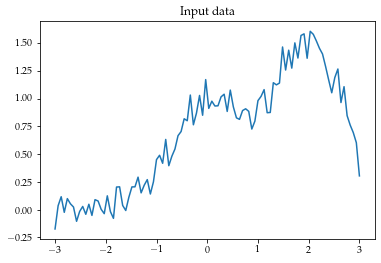

In [ ]:
plt.figure()
plt.plot(x, y)
plt.title("Input data")

In [5]:
y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()
X_train_df = pd.DataFrame()
X_test_df = pd.DataFrame()

for degree in range(1, maxdegree+1):
    X_train, X_test, y_train, y_test = prepare_data(x, y, 
                                                    degree, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    scale_x=False,
                                                    scale_y=False,
                                                    intercept=False)
    
    model = OLS() # Instansiate the model
    model.fit(X_train, y_train) # Training the model

    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    X_train_df[f"Degree{degree}"] = X_train[:,1:2].flatten()
    y_train_df[f"Degree{degree}"] = y_train.flatten()
    y_hat_train_df[f"Degree{degree}"] = y_hat_train.flatten()
    
    X_test_df[f"Degree{degree}"] = X_test[:,1:2].flatten()
    y_test_df[f"Degree{degree}"] = y_test.flatten()
    y_hat_test_df[f"Degree{degree}"] = y_hat_test.flatten()

In [6]:
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()

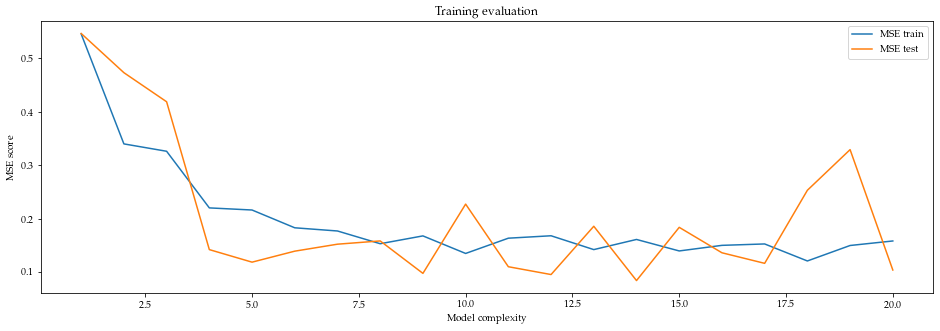

In [7]:
x_plot = np.arange(1,maxdegree+1)
plt.figure(figsize=(16,5))
plt.plot(x_plot, mse_scores_train, label="MSE train")
plt.plot(x_plot, mse_scores_test, label="MSE test")
plt.xlabel("Model complexity")
plt.ylabel("MSE score")
plt.title("Training evaluation")
plt.legend()

In [8]:
#print(y_train_df.mean())
#print(y_hat_train_df.mean())
#print(y_test_df.mean())
#print(y_hat_test_df.mean())

In [9]:
#print(y_train_df.var())
#print(y_hat_train_df.var())
#print(y_test_df.var())
#print(y_hat_test_df.var())

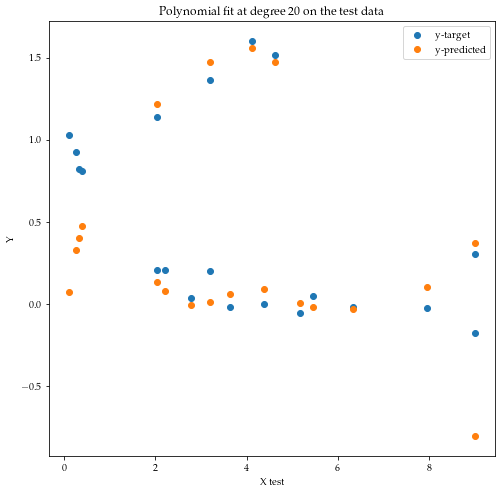

In [10]:
degree = 20
plt.figure(figsize=(8,8))
plt.scatter(X_test_df[f"Degree{degree}"], y_test_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_test_df[f"Degree{degree}"], y_hat_test_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X test")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the test data")
plt.legend()

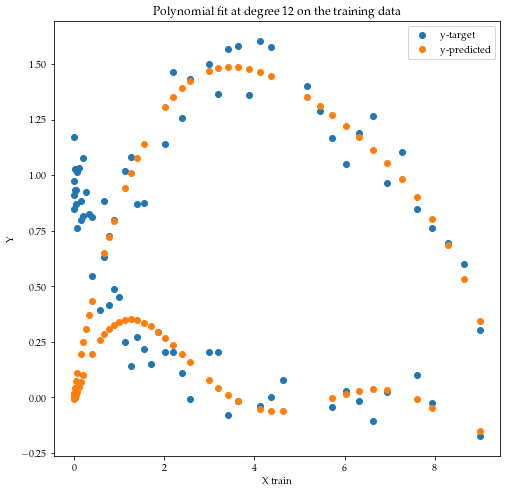

In [11]:
degree = 12
x_plot = np.arange(degree)

plt.figure(figsize=(8,8))

plt.scatter(X_train_df[f"Degree{degree}"], y_train_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_train_df[f"Degree{degree}"], y_hat_train_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X train")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the training data")
plt.legend()

# Exercises week35

In [12]:
#The following simple Python instructions define our x and y values (with 100 data points).
np.random.seed(4155)
x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100) # Second order polynomial with noise
p = 2 # polynomial degree / number of features

# Data preparation
X_train, X_test, y_train, y_test = prepare_data(x, y, 
                                                features=p, 
                                                test_size=0.2, 
                                                shuffle=True, 
                                                scale_x=True,
                                                scale_y=False,
                                                intercept=False)
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")

# Creating dataframes of the data
X_train_df = pd.DataFrame(X_train, columns=[f"x{f}" for f in np.arange(p)])
X_test_df = pd.DataFrame(X_test, columns=[f"x{f}" for f in np.arange(p)])
#y_train_df = pd.DataFrame(y_train, columns=["y"])
#y_test_df = pd.DataFrame(y_test, columns=["y"])

X_train.shape:(80, 2)
X_test.shape:(20, 2)


In [13]:
# OLS / Linear Regression
## Instansiate the model
model = OLS() 

## Training the model
model.fit(X_train, y_train) 

## Predictions
y_hat_train = model.predict(X_train) # predict on train data
y_hat_test = model.predict(X_test) # predict on test data

## Evaluation
print(f"Training R2 for OLS: {R2(y_train,y_hat_train)}")
print(f"Training MSE for OLS: {MSE(y_train,y_hat_train)}")
print(f"Test R2 for OLS: {R2(y_test,y_hat_test)}")
print(f"Test MSE OLS: {MSE(y_test,y_hat_test)}")

Training R2 for OLS: -4.3995092953861805
Training MSE for OLS: 12.577037668688826
Test R2 for OLS: -3.884879789764736
Test MSE OLS: 12.49264925912098


In [14]:
# Ridge regression
nbf_lambdas = 20
lambdas = np.logspace(-1,2, nbf_lambdas)

y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()

for lam in lambdas:
    model = RidgeRegression() # Instansiate the model
    model.fit(X_train, y_train, lam) # Training the model
   
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    y_train_df[f"lambda_{lam}"] = y_train.flatten() 
    y_hat_train_df[f"lambda_{lam}"] = y_hat_train.flatten()
    y_test_df[f"lambda_{lam}"] = y_test.flatten()
    y_hat_test_df[f"lambda_{lam}"] = y_hat_test.flatten()


In [15]:
# MSE calculations for all lambda values
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train = 1 - ((y_train_df - y_hat_train_df) ** 2).sum() / ((y_train_df - y_train_df.mean())**2).sum() 
R2_scores_test = 1 - ((y_test_df - y_hat_test_df) ** 2).sum() / ((y_test_df - y_test_df.mean())**2).sum()

In [16]:
#display(mse_scores_train[f"lambda_{1}"])

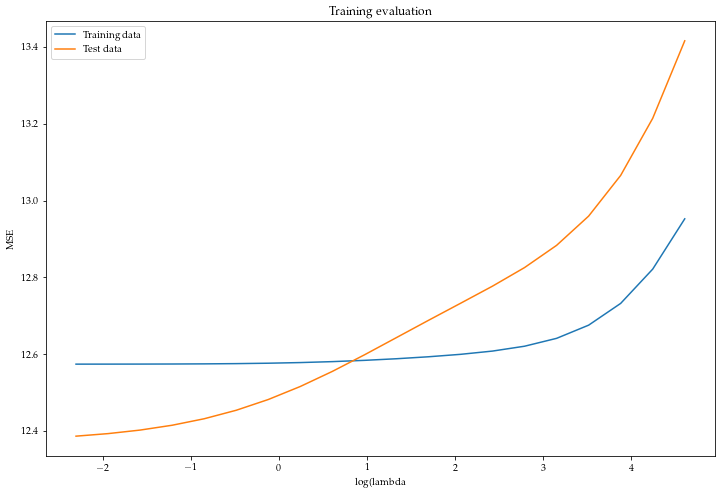

In [17]:
lam = 3
x_plot = np.arange(nbf_lambdas)
plt.figure(figsize=(12,8))
plt.plot(np.log(lambdas), mse_scores_train, label="Training data")
plt.plot(np.log(lambdas), mse_scores_test, label="Test data")
plt.xlabel("log(lambda")
plt.ylabel("MSE")
plt.title("Training evaluation")
plt.legend()

In [18]:
"""
lam = 3
x_plot = np.arange(nbf_lambdas)
plt.figure(figsize=(12,8))
plt.scatter(X_train_df["x0"], y_train_df[f"lambda_{1}"], label="y")
plt.scatter(X_train_df["x0"], y_hat_train_df[f"lambda_{1}"], label="$\hat{y}$")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Training evaluation")
plt.legend()
"""

'\nlam = 3\nx_plot = np.arange(nbf_lambdas)\nplt.figure(figsize=(12,8))\nplt.scatter(X_train_df["x0"], y_train_df[f"lambda_{1}"], label="y")\nplt.scatter(X_train_df["x0"], y_hat_train_df[f"lambda_{1}"], label="$\\hat{y}$")\nplt.xlabel("x values")\nplt.ylabel("y values")\nplt.title("Training evaluation")\nplt.legend()\n'

# Exercise2

In [19]:
# Making meshgrid of datapoints and compute Franke's function
np.random.seed(4155)
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)
print(X.shape)

(1000, 21)


In [20]:
#The following simple Python instructions define our x and y values (with 100 data points).
# Data preparation
X_train, X_test, y_train, y_test = prepare_data(x, z, 
                                                features=p, 
                                                test_size=0.2, 
                                                shuffle=True, 
                                                scale_x=True,
                                                scale_y=False,
                                                intercept=False,
                                                X=X)
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")

# Creating dataframes of the data
X_train_df = pd.DataFrame(X_train, columns=[f"x{f}" for f in np.arange(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f"x{f}" for f in np.arange(X_train.shape[1])])

X_train.shape:(800, 21)
X_test.shape:(200, 21)


In [21]:
# Ridge regression
nbf_lambdas = 20
lambdas = np.logspace(-1,2, nbf_lambdas)

y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()

for lam in lambdas:
    model = RidgeRegression() # Instansiate the model
    model.fit(X_train, y_train, lam) # Training the model
   
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    y_train_df[f"lambda_{lam}"] = y_train.flatten() 
    y_hat_train_df[f"lambda_{lam}"] = y_hat_train.flatten()
    y_test_df[f"lambda_{lam}"] = y_test.flatten()
    y_hat_test_df[f"lambda_{lam}"] = y_hat_test.flatten()


In [22]:
# MSE calculations for all lambda values
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train = 1 - ((y_train_df - y_hat_train_df) ** 2).sum() / ((y_train_df - y_train_df.mean())**2).sum() 
R2_scores_test = 1 - ((y_test_df - y_hat_test_df) ** 2).sum() / ((y_test_df - y_test_df.mean())**2).sum()

In [23]:
display(mse_scores_test)

lambda_0.1                    0.260201
lambda_0.14384498882876628    0.260895
lambda_0.20691380811147897    0.261888
lambda_0.29763514416313175    0.263251
lambda_0.42813323987193935    0.265027
lambda_0.6158482110660264     0.267196
lambda_0.8858667904100825     0.269658
lambda_1.2742749857031335     0.272243
lambda_1.8329807108324356     0.274766
lambda_2.636650898730358      0.277073
lambda_3.79269019073225       0.279079
lambda_5.455594781168517      0.280767
lambda_7.847599703514611      0.282171
lambda_11.288378916846883     0.283357
lambda_16.23776739188721      0.284402
lambda_23.357214690901213     0.285386
lambda_33.59818286283781      0.286390
lambda_48.32930238571752      0.287499
lambda_69.51927961775606      0.288818
lambda_100.0                  0.290490
dtype: float64

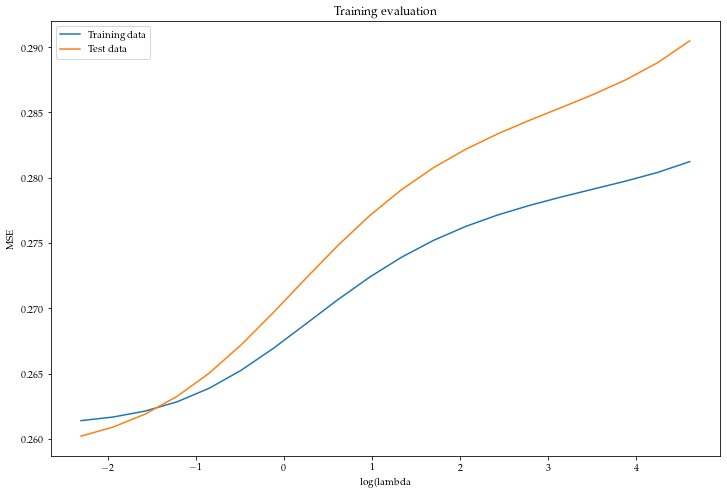

In [24]:
plt.figure(figsize=(12,8))
plt.plot(np.log(lambdas), mse_scores_train, label="Training data")
plt.plot(np.log(lambdas), mse_scores_test, label="Test data")
plt.xlabel("log(lambda")
plt.ylabel("MSE")
plt.title("Training evaluation")
plt.legend()

## Ridge with sklearn

In [26]:
nbf_lambdas = 20
lambdas = np.logspace(-1,2, nbf_lambdas)

y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()

for lam in lambdas:
    model = Ridge(alpha=lam) # Instansiate the model
    model.fit(X_train, y_train) # Training the model
   
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    y_train_df[f"lambda_{lam}"] = y_train.flatten() 
    y_hat_train_df[f"lambda_{lam}"] = y_hat_train.flatten()
    y_test_df[f"lambda_{lam}"] = y_test.flatten()
    y_hat_test_df[f"lambda_{lam}"] = y_hat_test.flatten()

In [27]:
# MSE calculations for all lambda values
mse_scores_train_SK = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test_SK = ((y_test_df - y_hat_test_df) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train_SK = 1 - ((y_train_df - y_hat_train_df) ** 2).sum() / ((y_train_df - y_train_df.mean())**2).sum() 
R2_scores_test_SK = 1 - ((y_test_df - y_hat_test_df) ** 2).sum() / ((y_test_df - y_test_df.mean())**2).sum()

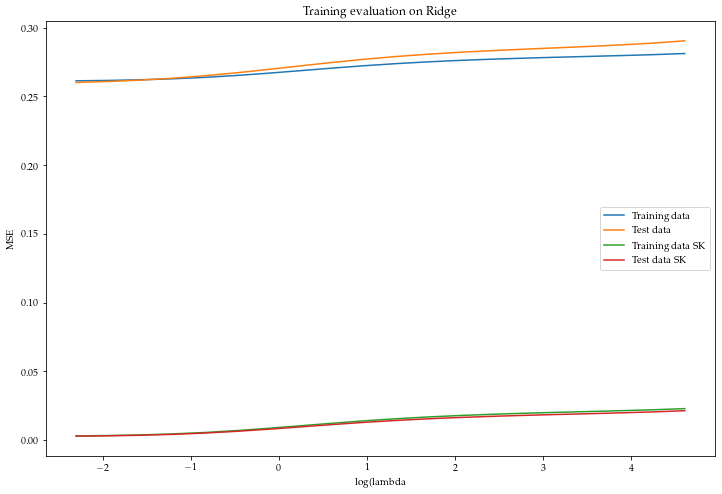

In [28]:
plt.figure(figsize=(12,8))
plt.plot(np.log(lambdas), mse_scores_train, label="Training data")
plt.plot(np.log(lambdas), mse_scores_test, label="Test data")
plt.plot(np.log(lambdas), mse_scores_train_SK, label="Training data SK")
plt.plot(np.log(lambdas), mse_scores_test_SK, label="Test data SK")
plt.xlabel("log(lambda")
plt.ylabel("MSE")
plt.title("Training evaluation on Ridge")
plt.legend()

## Lasso

In [29]:
nbf_lambdas = 20
lambdas = np.logspace(-1,2, nbf_lambdas)

y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()

for lam in lambdas:
    model = Lasso(alpha=lam) # Instansiate the model
    model.fit(X_train, y_train, lam) # Training the model
   
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    y_train_df[f"lambda_{lam}"] = y_train.flatten() 
    y_hat_train_df[f"lambda_{lam}"] = y_hat_train.flatten()
    y_test_df[f"lambda_{lam}"] = y_test.flatten()
    y_hat_test_df[f"lambda_{lam}"] = y_hat_test.flatten()

In [30]:
# MSE calculations for all lambda values
mse_scores_train_SK = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test_SK = ((y_test_df - y_hat_test_df) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train_SK = 1 - ((y_train_df - y_hat_train_df) ** 2).sum() / ((y_train_df - y_train_df.mean())**2).sum() 
R2_scores_test_SK = 1 - ((y_test_df - y_hat_test_df) ** 2).sum() / ((y_test_df - y_test_df.mean())**2).sum()

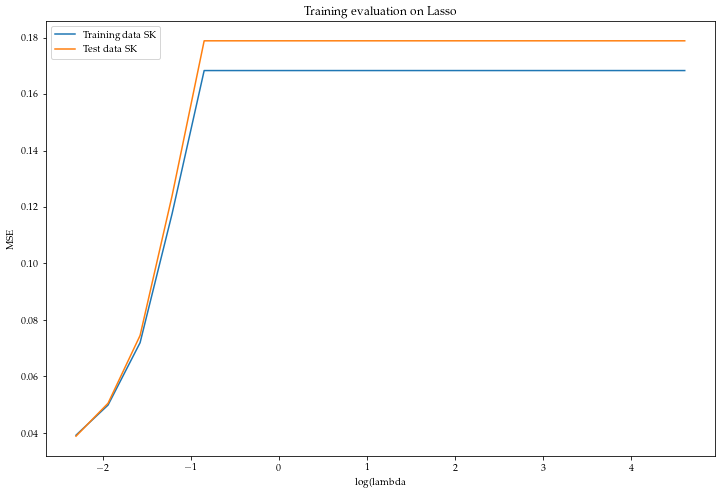

In [31]:
plt.figure(figsize=(12,8))
plt.plot(np.log(lambdas), mse_scores_train_SK, label="Training data SK")
plt.plot(np.log(lambdas), mse_scores_test_SK, label="Test data SK")
plt.xlabel("log(lambda")
plt.ylabel("MSE")
plt.title("Training evaluation on Lasso")
plt.legend()

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


z = FrankeFunction(x,y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Using matplotlib backend: Qt5Agg


<ipython-input-44-455216fb5d48>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [87]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 500)#, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('??')

Text(0.5, 0.92, '??')

In [123]:
# Make data.
np.random.seed(4155)
n = 5
N = 1000
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
#x, y = np.meshgrid(x,y)
X = create_X(x, y, n=n)
z = FrankeFunction(x,y)



#The following simple Python instructions define our x and y values (with 100 data points).
# Data preparation
XY_train, XY_test, z_train, z_test = prepare_data(None, z, 
                                                features=p, 
                                                test_size=0.2, 
                                                shuffle=True, 
                                                scale_x=True,
                                                scale_y=False,
                                                intercept=False,
                                                X=X)
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")

# Creating dataframes of the data
X_train_df = pd.DataFrame(X_train, columns=[f"x{f}" for f in np.arange(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f"x{f}" for f in np.arange(X_train.shape[1])])

nbf_lambdas = 20
lambdas = np.logspace(-1,2, nbf_lambdas)

z_train_df = pd.DataFrame()
z_hat_train_df = pd.DataFrame()
z_test_df = pd.DataFrame()
z_hat_test_df = pd.DataFrame()

for lam in lambdas:
    model = Lasso(alpha=lam) # Instansiate the model
    model.fit(X_train, z_train, lam) # Training the model
    
    # Predictions
    z_hat_train = model.predict(X_train) # predict on train data
    z_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    z_train_df[f"lambda_{lam}"] = z_train.flatten() 
    z_hat_train_df[f"lambda_{lam}"] = z_hat_train.flatten()
    z_test_df[f"lambda_{lam}"] = z_test.flatten()
    z_hat_test_df[f"lambda_{lam}"] = z_hat_test.flatten()

X_train.shape:(16, 21)
X_test.shape:(4, 21)


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z_hat, 500)#, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('??')